In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/var/folders/0p/k705g0x102v0x_kgxydj12kc0000gn/T/ipykernel_26971/82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
import glob
import pandas as pd
import natsort
from datetime import datetime, timedelta

In [3]:
year = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
leap_year = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [4]:
type_A = [0, 3, 4, 5, 9, 10, 11]
type_B = [1, 2]
type_C = [6, 7]
type_D = [8]

In [5]:
col_list = ['YMD', '3시간기온', '6시간강수량', '6시간신적설', '강수형태', '강수확률', '습도', '일최고기온', '일최저기온', '파고', '풍속', '풍향', '하늘상태']

In [6]:
def date_range(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    dates = [(start + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end-start).days+1)]
    return dates

In [7]:
# 2016년 
folder_2012 = os.listdir(f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_데이터/2016')
folder_2012 = natsort.natsorted(folder_2012)

for area in folder_2012:
    print(area)
    file_list = os.listdir(f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_데이터/2016/{area}')
    file_list = natsort.natsorted(file_list)

    # 빈 일별 데이터 프레임 생성
    dates = pd.DataFrame(columns=col_list)
    dates['YMD'] = date_range('2016-01-01', '2016-12-31')
    
    data = pd.DataFrame()
    
    counts = 1
    for file in file_list:
        print(file)
        file = pd.read_csv(f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_데이터/2016/{area}/{file}')
        if '  format: day' in file[' format: day'].values:
            x = file[file[' format: day'] == '  format: day'].index[0]
            file = file.iloc[:x, :]
            
        if counts == 9:
            counts += 1
            continue
        
        # 일자 추가
        days = file.loc[:, ' format: day'].str.replace(' ', '')                

        month_index = file[file[' format: day'].str.contains('Star')].index
        month = 1
        i = 0
        
        for n in range(len(file[' format: day'])):
            if days[n].find('Start') != -1:
                month = file.loc[month_index[i], ' format: day'].replace(' Start : ', '')[4:6]
                i += 1

            file.loc[n, 'YMD'] = f'2016-{month}-{days[n]}'
        
        # 'Start%' drop
        start_index = file[file[' format: day'].str.contains('Start')].index
        file.drop(index=start_index, inplace=True)

        # object -> numeric
        for x in range(len(file.columns)-1):
            file.iloc[:, x] = pd.to_numeric(file.iloc[:, x])

        # 일단위 예측 범위 설정
        file = file[file['hour'] == 200]
        file = file[file['forecast'] <= 22]
        file.reset_index(drop=True, inplace=True)
        
        # datetime type으로 변환 - > str
        file['YMD'] = pd.to_datetime(file['YMD'])
        file['YMD'] = file['YMD'].astype(str)
        
        
        # 일별 평균
        mean_value = file.groupby(['YMD'], as_index=False).mean()
        
        
        for indexs in range(len(mean_value['YMD'])):
            target_index = dates[mean_value.loc[indexs, 'YMD'] == dates['YMD']].index
            try:
                dates.iloc[target_index, counts] = mean_value.iloc[indexs, 4]
            except:
                continue
        counts += 1
        
        if counts == 13:
            data = pd.concat([data, dates], ignore_index=False)
            print(data)
            counts = 1

    data['area'] = area
    data.to_csv(path_or_buf=f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_모음/2016_{area}.csv')

강원
갈말읍_3시간기온_201601_201612.csv
갈말읍_6시간강수량_201601_201612.csv
갈말읍_6시간적설_201601_201612.csv
갈말읍_강수형태_201601_201612.csv
갈말읍_강수확률_201601_201612.csv
갈말읍_습도_201601_201612.csv
갈말읍_일최고기온_201601_201612.csv
갈말읍_일최저기온_201601_201612.csv
갈말읍_파고_201601_201612.csv
갈말읍_풍속_201601_201612.csv
갈말읍_풍향_201601_201612.csv
갈말읍_하늘상태_201601_201612.csv
            YMD     3시간기온    6시간강수량    6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  0.857143  0.333333  0.333333  0.571429  32.857143  80.714286   
1    2016-01-02  2.857143       0.0       0.0       0.0       20.0  82.857143   
2    2016-01-03  1.285714       0.0       0.0       0.0       20.0  82.142857   
3    2016-01-04 -2.714286       0.0       0.0       0.0  17.142857  57.142857   
4    2016-01-05 -5.428571       0.0       0.0       0.0       10.0  60.714286   
..          ...       ...       ...       ...       ...        ...        ...   
361  2016-12-27 -7.857143       0.0       0.0       0.0       10.0  64.285714   
362  2016-12-28 -3.571429  

송정동_6시간강수량_201601_201612.csv
송정동_6시간적설_201601_201612.csv
송정동_강수형태_201601_201612.csv
송정동_강수확률_201601_201612.csv
송정동_습도_201601_201612.csv
송정동_일최고기온_201601_201612.csv
송정동_일최저기온_201601_201612.csv
송정동_파고_201601_201612.csv
송정동_풍속_201601_201612.csv
송정동_풍향_201601_201612.csv
송정동_하늘상태_201601_201612.csv
            YMD     3시간기온    6시간강수량    6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  0.857143  0.333333  0.333333  0.571429  32.857143  80.714286   
1    2016-01-02  2.857143       0.0       0.0       0.0       20.0  82.857143   
2    2016-01-03  1.285714       0.0       0.0       0.0       20.0  82.142857   
3    2016-01-04 -2.714286       0.0       0.0       0.0  17.142857  57.142857   
4    2016-01-05 -5.428571       0.0       0.0       0.0       10.0  60.714286   
..          ...       ...       ...       ...       ...        ...        ...   
361  2016-12-27  0.428571       5.0       5.0  1.714286  55.714286  77.142857   
362  2016-12-28  1.428571       0.0       0.0       0.0   

인제읍_강수확률_201601_201612.csv
인제읍_습도_201601_201612.csv
인제읍_일최고기온_201601_201612.csv
인제읍_일최저기온_201601_201612.csv
인제읍_파고_201601_201612.csv
인제읍_풍속_201601_201612.csv
인제읍_풍향_201601_201612.csv
인제읍_하늘상태_201601_201612.csv
            YMD     3시간기온    6시간강수량    6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  0.857143  0.333333  0.333333  0.571429  32.857143  80.714286   
1    2016-01-02  2.857143       0.0       0.0       0.0       20.0  82.857143   
2    2016-01-03  1.285714       0.0       0.0       0.0       20.0  82.142857   
3    2016-01-04 -2.714286       0.0       0.0       0.0  17.142857  57.142857   
4    2016-01-05 -5.428571       0.0       0.0       0.0       10.0  60.714286   
..          ...       ...       ...       ...       ...        ...        ...   
361  2016-12-27 -5.285714  0.333333  0.333333  0.857143  22.857143       75.0   
362  2016-12-28 -2.857143       0.0       0.0       0.0       10.0  50.714286   
363  2016-12-29 -6.142857       0.0       0.0       0.0      

홍천읍_일최저기온_201601_201612.csv
홍천읍_파고_201601_201612.csv
홍천읍_풍속_201601_201612.csv
홍천읍_풍향_201601_201612.csv
홍천읍_하늘상태_201601_201612.csv
            YMD     3시간기온    6시간강수량    6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  0.857143  0.333333  0.333333  0.571429  32.857143  80.714286   
1    2016-01-02  2.857143       0.0       0.0       0.0       20.0  82.857143   
2    2016-01-03  1.285714       0.0       0.0       0.0       20.0  82.142857   
3    2016-01-04 -2.714286       0.0       0.0       0.0  17.142857  57.142857   
4    2016-01-05 -5.428571       0.0       0.0       0.0       10.0  60.714286   
..          ...       ...       ...       ...       ...        ...        ...   
361  2016-12-27 -5.142857  0.333333  0.333333  0.428571  14.285714  86.428571   
362  2016-12-28 -1.857143  1.666667  1.666667  0.857143  21.428571       70.0   
363  2016-12-29 -5.142857       0.0       0.0       0.0        0.0  58.571429   
364  2016-12-30      -2.0       0.0       0.0       0.0  17.

생연1동_풍향_201601_201612.csv
생연1동_하늘상태_201601_201612.csv
            YMD     3시간기온    6시간강수량    6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  3.028571       0.0       0.0       0.0  24.285714  73.571429   
1    2016-01-02  4.414286       0.0       0.0       0.0       20.0  72.142857   
2    2016-01-03       4.1       0.0       0.0       0.0       20.0  75.142857   
3    2016-01-04 -1.742857       0.0       0.0       0.0       20.0  57.714286   
4    2016-01-05 -4.328571       0.0       0.0       0.0  11.428571  61.428571   
..          ...       ...       ...       ...       ...        ...        ...   
361  2016-12-27      -6.0       0.0       0.0       0.0        0.0  59.285714   
362  2016-12-28 -2.571429  1.666667  1.666667  0.428571  18.571429  53.571429   
363  2016-12-29 -6.142857       0.0       0.0       0.0   1.428571  50.714286   
364  2016-12-30 -1.142857       0.0       0.0       0.0  17.142857  65.714286   
365  2016-12-31  0.714286       0.0       0.0       0.0

내이동_6시간강수량_201601_201612.csv
내이동_6시간적설_201601_201612.csv
내이동_강수형태_201601_201612.csv
내이동_강수확률_201601_201612.csv
내이동_습도_201601_201612.csv
내이동_일최고기온_201601_201612.csv
내이동_일최저기온_201601_201612.csv
내이동_파고_201601_201612.csv
내이동_풍속_201601_201612.csv
내이동_풍향_201601_201612.csv
내이동_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  5.285714    0.0    0.0  0.0  15.714286  59.285714  12.333333   
1    2016-01-02  7.714286    0.0    0.0  0.0  11.428571  69.285714  13.333333   
2    2016-01-03  7.714286    0.0    0.0  0.0   7.142857  66.428571  12.333333   
3    2016-01-04  6.285714    0.0    0.0  0.0  18.571429  52.857143   9.333333   
4    2016-01-05  3.142857    0.0    0.0  0.0  14.285714  39.285714        7.0   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27 -0.428571    0.0    0.0  0.0        0.0  52.857143        7.0   
362  2016-12-28  0.857143    0.0    0.0  0.0   7.142857  5

의령읍_6시간강수량_201601_201612.csv
의령읍_6시간적설_201601_201612.csv
의령읍_강수형태_201601_201612.csv
의령읍_강수확률_201601_201612.csv
의령읍_습도_201601_201612.csv
의령읍_일최고기온_201601_201612.csv
의령읍_일최저기온_201601_201612.csv
의령읍_파고_201601_201612.csv
의령읍_풍속_201601_201612.csv
의령읍_풍향_201601_201612.csv
의령읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  5.285714    0.0    0.0  0.0  15.714286  59.285714  12.333333   
1    2016-01-02  7.714286    0.0    0.0  0.0  11.428571  69.285714  13.333333   
2    2016-01-03  7.714286    0.0    0.0  0.0   7.142857  66.428571  12.333333   
3    2016-01-04  6.285714    0.0    0.0  0.0  18.571429  52.857143   9.333333   
4    2016-01-05  3.142857    0.0    0.0  0.0  14.285714  39.285714        7.0   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27 -1.742857    0.0    0.0  0.0        0.0  52.285714        6.2   
362  2016-12-28      -0.5    0.0    0.0  0.0   8.857143  5

함양읍_6시간강수량_201601_201612.csv
함양읍_6시간적설_201601_201612.csv
함양읍_강수형태_201601_201612.csv
함양읍_강수확률_201601_201612.csv
함양읍_습도_201601_201612.csv
함양읍_일최고기온_201601_201612.csv
함양읍_일최저기온_201601_201612.csv
함양읍_파고_201601_201612.csv
함양읍_풍속_201601_201612.csv
함양읍_풍향_201601_201612.csv
함양읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  5.285714    0.0    0.0  0.0  15.714286  59.285714  12.333333   
1    2016-01-02  7.714286    0.0    0.0  0.0  11.428571  69.285714  13.333333   
2    2016-01-03  7.714286    0.0    0.0  0.0   7.142857  66.428571  12.333333   
3    2016-01-04  6.285714    0.0    0.0  0.0  18.571429  52.857143   9.333333   
4    2016-01-05  3.142857    0.0    0.0  0.0  14.285714  39.285714        7.0   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27 -1.428571    0.0    0.0  0.0        0.0  57.857143        5.0   
362  2016-12-28 -0.142857    0.0    0.0  0.0  11.428571  5

선주원남동_6시간강수량_201601_201612.csv
선주원남동_6시간적설_201601_201612.csv
선주원남동_강수형태_201601_201612.csv
선주원남동_강수확률_201601_201612.csv
선주원남동_습도_201601_201612.csv
선주원남동_일최고기온_201601_201612.csv
선주원남동_일최저기온_201601_201612.csv
선주원남동_파고_201601_201612.csv
선주원남동_풍속_201601_201612.csv
선주원남동_풍향_201601_201612.csv
선주원남동_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도     일최고기온  \
0    2016-01-01       2.0    0.0    0.0  0.0  17.142857       65.0  9.333333   
1    2016-01-02  4.142857    0.0    0.0  0.0  11.428571  73.571429      11.0   
2    2016-01-03  6.142857    0.0    0.0  0.0  14.285714  68.571429  8.666667   
3    2016-01-04  3.142857    0.0    0.0  0.0       20.0  45.714286  5.666667   
4    2016-01-05      -1.0    0.0    0.0  0.0       10.0  47.857143  3.333333   
..          ...       ...    ...    ...  ...        ...        ...       ...   
361  2016-12-27 -1.142857    0.0    0.0  0.0   1.428571       50.0  4.666667   
362  2016-12-28  0.571429    0.0    0.0  0.0

의성읍_6시간강수량_201601_201612.csv
의성읍_6시간적설_201601_201612.csv
의성읍_강수형태_201601_201612.csv
의성읍_강수확률_201601_201612.csv
의성읍_습도_201601_201612.csv
의성읍_일최고기온_201601_201612.csv
의성읍_일최저기온_201601_201612.csv
의성읍_파고_201601_201612.csv
의성읍_풍속_201601_201612.csv
의성읍_풍향_201601_201612.csv
의성읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도     일최고기온  \
0    2016-01-01       2.0    0.0    0.0  0.0  17.142857       65.0  9.333333   
1    2016-01-02  4.142857    0.0    0.0  0.0  11.428571  73.571429      11.0   
2    2016-01-03  6.142857    0.0    0.0  0.0  14.285714  68.571429  8.666667   
3    2016-01-04  3.142857    0.0    0.0  0.0       20.0  45.714286  5.666667   
4    2016-01-05      -1.0    0.0    0.0  0.0       10.0  47.857143  3.333333   
..          ...       ...    ...    ...  ...        ...        ...       ...   
361  2016-12-27      -4.0    0.0    0.0  0.0   8.571429  67.857143  4.666667   
362  2016-12-28 -2.142857    0.0    0.0  0.0       10.0  63.571429

풍기읍_6시간강수량_201601_201612.csv
풍기읍_6시간적설_201601_201612.csv
풍기읍_강수형태_201601_201612.csv
풍기읍_강수확률_201601_201612.csv
풍기읍_습도_201601_201612.csv
풍기읍_일최고기온_201601_201612.csv
풍기읍_일최저기온_201601_201612.csv
풍기읍_파고_201601_201612.csv
풍기읍_풍속_201601_201612.csv
풍기읍_풍향_201601_201612.csv
풍기읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도     일최고기온  \
0    2016-01-01       2.0    0.0    0.0  0.0  17.142857       65.0  9.333333   
1    2016-01-02  4.142857    0.0    0.0  0.0  11.428571  73.571429      11.0   
2    2016-01-03  6.142857    0.0    0.0  0.0  14.285714  68.571429  8.666667   
3    2016-01-04  3.142857    0.0    0.0  0.0       20.0  45.714286  5.666667   
4    2016-01-05      -1.0    0.0    0.0  0.0       10.0  47.857143  3.333333   
..          ...       ...    ...    ...  ...        ...        ...       ...   
361  2016-12-27      -2.0    0.0    0.0  0.0   8.571429  66.428571  2.333333   
362  2016-12-28 -1.142857    0.0    0.0  0.0  11.428571  54.285714

대청동_6시간강수량_201601_201612.csv
대청동_6시간적설_201601_201612.csv
대청동_강수형태_201601_201612.csv
대청동_강수확률_201601_201612.csv
대청동_습도_201601_201612.csv
대청동_일최고기온_201601_201612.csv
대청동_일최저기온_201601_201612.csv
대청동_파고_201601_201612.csv
대청동_풍속_201601_201612.csv
대청동_풍향_201601_201612.csv
대청동_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  7.428571    0.0    0.0  0.0  15.714286  53.571429  13.666667   
1    2016-01-02  9.428571    0.0    0.0  0.0  11.428571  57.857143       14.0   
2    2016-01-03  9.571429    0.0    0.0  0.0   7.142857  55.714286  12.333333   
3    2016-01-04  8.142857    0.0    0.0  0.0  18.571429  52.142857  10.333333   
4    2016-01-05       4.0    0.0    0.0  0.0  14.285714  40.714286   8.666667   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27  2.428571    0.0    0.0  0.0        0.0       45.0   8.666667   
362  2016-12-28  3.714286    0.0    0.0  0.0   7.142857  4

동인천동_6시간강수량_201601_201612.csv
동인천동_6시간적설_201601_201612.csv
동인천동_강수형태_201601_201612.csv
동인천동_강수확률_201601_201612.csv
동인천동_습도_201601_201612.csv
동인천동_일최고기온_201601_201612.csv
동인천동_일최저기온_201601_201612.csv
동인천동_파고_201601_201612.csv
동인천동_풍속_201601_201612.csv
동인천동_풍향_201601_201612.csv
동인천동_하늘상태_201601_201612.csv
            YMD     3시간기온    6시간강수량    6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  3.885714       0.0       0.0       0.0   5.714286  65.857143   
1    2016-01-02  7.642857       0.0       0.0       0.0   2.428571  82.571429   
2    2016-01-03  7.228571       0.0       0.0       0.0   1.857143  82.857143   
3    2016-01-04  2.057143       0.0       0.0       0.0   3.857143  57.857143   
4    2016-01-05 -0.085714       0.0       0.0       0.0        1.0  63.142857   
..          ...       ...       ...       ...       ...        ...        ...   
361  2016-12-27 -4.285714       0.0       0.0       0.0        0.0  45.714286   
362  2016-12-28      -1.0  0.333333  1.666667  

고흥읍_파고_201601_201612.csv
고흥읍_풍속_201601_201612.csv
고흥읍_풍향_201601_201612.csv
고흥읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  3.571429    0.0    0.0  0.0       20.0  77.142857  11.333333   
1    2016-01-02  6.142857    0.0    0.0  0.0       20.0  79.285714  12.333333   
2    2016-01-03       6.0    0.0    0.0  0.0  12.857143  76.428571  10.333333   
3    2016-01-04  4.857143    0.0    0.0  0.0  24.285714  64.285714   7.333333   
4    2016-01-05  0.428571    0.0    0.0  0.0  17.142857  65.714286   5.666667   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27 -0.285714    0.0    0.0  0.0   1.428571  52.714286   6.166667   
362  2016-12-28  1.128571    0.0    0.0  0.0  11.428571  51.857143   6.266667   
363  2016-12-29  0.242857    0.0    0.0  0.0        0.0  53.285714        7.2   
364  2016-12-30  1.085714    0.0    0.0  0.0       10.0  57.142857        8.9   
365  20

연산동_6시간강수량_201601_201612.csv
연산동_6시간적설_201601_201612.csv
연산동_강수형태_201601_201612.csv
연산동_강수확률_201601_201612.csv
연산동_습도_201601_201612.csv
연산동_일최고기온_201601_201612.csv
연산동_일최저기온_201601_201612.csv
연산동_파고_201601_201612.csv
연산동_풍속_201601_201612.csv
연산동_풍향_201601_201612.csv
연산동_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  3.571429    0.0    0.0  0.0       20.0  77.142857  11.333333   
1    2016-01-02  6.142857    0.0    0.0  0.0       20.0  79.285714  12.333333   
2    2016-01-03       6.0    0.0    0.0  0.0  12.857143  76.428571  10.333333   
3    2016-01-04  4.857143    0.0    0.0  0.0  24.285714  64.285714   7.333333   
4    2016-01-05  0.428571    0.0    0.0  0.0  17.142857  65.714286   5.666667   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27 -0.428571    0.0    0.0  0.0   1.428571  67.857143   4.333333   
362  2016-12-28  2.142857    0.0    0.0  0.0  12.857143   

해남읍_6시간강수량_201601_201612.csv
해남읍_6시간적설_201601_201612.csv
해남읍_강수형태_201601_201612.csv
해남읍_강수확률_201601_201612.csv
해남읍_습도_201601_201612.csv
해남읍_일최고기온_201601_201612.csv
해남읍_일최저기온_201601_201612.csv
해남읍_파고_201601_201612.csv
해남읍_풍속_201601_201612.csv
해남읍_풍향_201601_201612.csv
해남읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  3.571429    0.0    0.0  0.0       20.0  77.142857  11.333333   
1    2016-01-02  6.142857    0.0    0.0  0.0       20.0  79.285714  12.333333   
2    2016-01-03       6.0    0.0    0.0  0.0  12.857143  76.428571  10.333333   
3    2016-01-04  4.857143    0.0    0.0  0.0  24.285714  64.285714   7.333333   
4    2016-01-05  0.428571    0.0    0.0  0.0  17.142857  65.714286   5.666667   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27      -1.4    0.0    0.0  0.0   1.428571  57.142857        4.6   
362  2016-12-28 -0.042857    0.0    0.0  0.0  12.857143  5

덕진동_6시간강수량_201601_201612.csv
덕진동_6시간적설_201601_201612.csv
덕진동_강수형태_201601_201612.csv
덕진동_강수확률_201601_201612.csv
덕진동_습도_201601_201612.csv
덕진동_일최고기온_201601_201612.csv
덕진동_일최저기온_201601_201612.csv
덕진동_파고_201601_201612.csv
덕진동_풍속_201601_201612.csv
덕진동_풍향_201601_201612.csv
덕진동_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  3.128571    0.0    0.0       0.0       20.0  77.285714   
1    2016-01-02       6.5    0.0    0.0       0.0       20.0  77.428571   
2    2016-01-03  6.514286    0.0    0.0       0.0  15.857143       79.0   
3    2016-01-04       2.9    0.0    0.0       0.0       23.0  67.571429   
4    2016-01-05 -0.285714    0.0    0.0       0.0  14.142857  61.428571   
..          ...       ...    ...    ...       ...        ...        ...   
361  2016-12-27      -2.0    0.0    0.0       0.0   1.428571       65.0   
362  2016-12-28 -0.571429    0.0    0.0  0.428571  18.571429  66.428571   
363  2016-12-29      -2.0    0.

장수읍_6시간강수량_201601_201612.csv
장수읍_6시간적설_201601_201612.csv
장수읍_강수형태_201601_201612.csv
장수읍_강수확률_201601_201612.csv
장수읍_습도_201601_201612.csv
장수읍_일최고기온_201601_201612.csv
장수읍_일최저기온_201601_201612.csv
장수읍_파고_201601_201612.csv
장수읍_풍속_201601_201612.csv
장수읍_풍향_201601_201612.csv
장수읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설 강수형태       강수확률         습도      일최고기온  \
0    2016-01-01  3.128571    0.0    0.0  0.0       20.0  77.285714   9.666667   
1    2016-01-02       6.5    0.0    0.0  0.0       20.0  77.428571  10.533333   
2    2016-01-03  6.514286    0.0    0.0  0.0  15.857143       79.0   8.166667   
3    2016-01-04       2.9    0.0    0.0  0.0       23.0  67.571429        5.6   
4    2016-01-05 -0.285714    0.0    0.0  0.0  14.142857  61.428571   3.833333   
..          ...       ...    ...    ...  ...        ...        ...        ...   
361  2016-12-27 -5.285714    0.0    0.0  0.0   1.428571  67.142857        2.0   
362  2016-12-28 -2.857143    0.0    0.0  0.0  12.857143  7

한경면_6시간강수량_201601_201612.csv
한경면_6시간적설_201601_201612.csv
한경면_강수형태_201601_201612.csv
한경면_강수확률_201601_201612.csv
한경면_습도_201601_201612.csv
한경면_일최고기온_201601_201612.csv
한경면_일최저기온_201601_201612.csv
한경면_파고_201601_201612.csv
한경면_풍속_201601_201612.csv
한경면_풍향_201601_201612.csv
한경면_하늘상태_201601_201612.csv
            YMD      3시간기온    6시간강수량 6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01   9.285714       0.0    0.0       0.0       20.0  53.571429   
1    2016-01-02       12.0       0.0    0.0       0.0       20.0       60.0   
2    2016-01-03  11.714286       0.0    0.0       0.0  15.714286  55.714286   
3    2016-01-04   9.285714       0.0    0.0  0.142857  32.857143  68.571429   
4    2016-01-05   6.142857  1.666667    0.0  0.142857       30.0  64.285714   
..          ...        ...       ...    ...       ...        ...        ...   
361  2016-12-27   5.057143       0.0    0.0       0.0  25.571429  55.285714   
362  2016-12-28   5.557143       0.0    0.0       0.0       17.0  56.28571

부여읍_일최고기온_201601_201612.csv
부여읍_일최저기온_201601_201612.csv
부여읍_파고_201601_201612.csv
부여읍_풍속_201601_201612.csv
부여읍_풍향_201601_201612.csv
부여읍_하늘상태_201601_201612.csv
            YMD     3시간기온 6시간강수량 6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  1.142857    0.0    0.0       0.0  18.571429  76.142857   
1    2016-01-02  4.714286    0.0    0.0       0.0       20.0  82.428571   
2    2016-01-03  5.285714    0.0    0.0       0.0  17.142857  82.142857   
3    2016-01-04       1.0    0.0    0.0       0.0       20.0  69.285714   
4    2016-01-05 -2.571429    0.0    0.0       0.0  11.428571       65.0   
..          ...       ...    ...    ...       ...        ...        ...   
361  2016-12-27      -4.0    0.0    0.0       0.0   1.428571  59.142857   
362  2016-12-28 -1.714286    0.0    0.0  0.428571  18.571429  71.857143   
363  2016-12-29 -3.571429    0.0    0.0       0.0        0.0  67.142857   
364  2016-12-30 -1.428571    0.0    0.0       0.0  21.428571  70.714286   
365  2016-12-31  

교현.안림동_하늘상태_201601_201612.csv
            YMD     3시간기온    6시간강수량    6시간신적설      강수형태       강수확률         습도  \
0    2016-01-01  2.071429       0.0       0.0       0.0  18.714286  74.285714   
1    2016-01-02  5.914286       0.0       0.0       0.0       20.0       77.0   
2    2016-01-03  6.371429       0.0       0.0       0.0  16.571429  72.714286   
3    2016-01-04  1.542857       0.0       0.0       0.0       20.0  61.714286   
4    2016-01-05 -1.657143       0.0       0.0       0.0  11.428571  60.428571   
..          ...       ...       ...       ...       ...        ...        ...   
361  2016-12-27 -3.142857       0.0       0.0       0.0   8.571429       65.0   
362  2016-12-28 -1.285714  0.333333  0.333333  0.428571  15.714286  65.714286   
363  2016-12-29 -4.285714       0.0       0.0       0.0        0.0  54.285714   
364  2016-12-30 -1.857143       0.0       0.0       0.0  17.142857  71.428571   
365  2016-12-31 -0.142857       0.0       0.0       0.0  14.285714  77.857143  

취합 순서
1. 해당 년도의 각 지역별로 취합 (2012 : 강원, 2012 : 경기...) /  (2013 : 강원, 2012 : 경기...) ..
2. 각 년도 별로 지역 취합 (2012, 2013 ...)
3. 년도 취합

문제
1. forecast의 수가 다르다.

    문제 이유: 각 feature들이 파일형태로 찢어져 있기 때문에 파일을 열로 붙여줘야 함. 원 형태로는 붙일 수가 없음.
    
    ex)
    
    file = file[file['hour'] == 200]

    file = file[file['forecast'] <= 22]
    
    이후 일별로 '3시간 기온'은 forecast가 7개 남고, '12시간 강수량'은 4개가 남음 -> 파일마다 row수가 다르게 남는다.
    
때문에 4개의 type으로 구분함

['3시간기온', '12시간강수량', '12시간신적설', '강수형태', '강수확률', '습도', '일최고기온', '일최저기온', '파고', '풍속', '풍향', '하늘상태'] 순으로 forecast 수는

type_A = [0, 3, 4, 5, 9, 10, 11] / 7개

type_B = [1, 2] / 4개

type_C = [6, 7] / 2개

type_D = [8] / '파고' 인데 해당 되지 않는 지역이 있어서 예외 처리 해줘야한다.

해결방안 : 해당 파일의 일별 forecast를 각각 평균을 내주어 1일에 1row로 만들어 준 후, 년월일 정보를 가지고 있는 빈 데이터 프레임에 concat

2. 평균을 내어 1일에 1row로 만들기 위해서는 년월일 정보가 있어야 한다.

년: 해당 디렉토리 이름

월: 월이 바뀔 때마다 생성 되어있는 'Start'정보를 이용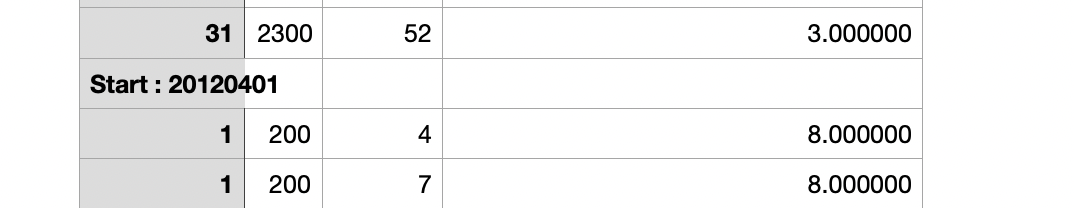
(정확히 확인 하지는 않았으나 'start' -> 'format'로 변경 되는 것과같이  년별로 표기가 상이한 부분이 있음)

일: 'format: day'

(년별로 datatype이 다르기 때문에 인덱싱 하는 것이 까다로움?)

3. 평균을 내기 위해서 data type을 numeric 하게 바꾸어야 한다.

월 정보를 담고있는 row 때문에 column들을 일괄적으로 변경이 불가능

-> 년월일을 지정한 후 '월 정보를 담고있는 row' drop

이외의 오류

2012년도는 11월과 12월 데이터가 누락 되어 있다.

2013년도 데이터는 중복 되어있다.(같은 데이터 1년치가 한번 더 들어가있음)

2015년도 데이터는 10일이 누락 되어 있다.

년도별로 data type 형태와 표기가 다른 년도가 있다.

(columns 내의 각 row마다 데이터 타입이 다를 수도 있다) 잘 기억은 안남 ㅎㅎ

column 이름 인덱싱 잘 안됨 특히  format: day (공백이나 뭔가 있는 듯)

등등?

1. 월년일 정보(201%-01-01 ~ 201%-12-31)를 가지고 있는 dataFrame 생성

2. 파일에 년월일 정보 입력

3. 'start' row drop

3.